<a href="https://colab.research.google.com/github/GoldenWanGila/Collage-Project/blob/master/%E9%80%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import matplotlib.pyplot as plt
from numpy.core import numeric
import seaborn as sns; sns.set()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sympy import *
from sklearn.linear_model import Lasso

上面import基本函式與模組
下方將資料集做初步整理

In [66]:
rail = pd.read_csv("/content/drive/MyDrive/railway_original.csv")
rail = rail.dropna()
rail = rail.drop([22157])
rail = rail.drop([291763])

rail = rail[rail["type"]==2]
rail = rail[rail["date"]>='2021/01/22']
rail = rail[rail["date"]!="2021/04/02"]
rail = rail[rail["date"]!="2021/04/03"]
rail = rail[rail["date"]!="2020/12/23"]

#早6-9、晚5-8
#rail=rail.drop([28684,42104,83423,94652,109189,241119,281214,320035,225222])
#rail=rail.drop([9554,25464,38332,78755,91610,105023,136664,160110,178243,194730,220481,237466 ,257552 ,276670,288466,302440,315877]) 

In [67]:
#縱北(豐原以北)
listn = [103,105,109,113,115,117,119,159,121,123,125,129,275,135,175,139,141,177,145,147,185,149,181,473,155]
railn = rail[rail["num"].isin(listn)]
#竹南、新竹
listn2 = [103,105,109,115,117,119,159,121,123,125,275,135,175,139,141,177,145,147,185,149,473,155]
railn2 = rail[rail["num"].isin(listn2)]
#苗栗、竹南
listn22 = [105,115,117,121,123,125,275,135,175,139,141,147,177,149,473,155]
railn22 = rail[rail["num"].isin(listn22)]
#山線(苗中彰)
list = [105,113,115,117,121,123,125,129,275,135,175,139,141,147,177,149,181,473,155]
rail = rail[rail["num"].isin(list)]
#301(中豐),101(豐),371(豐),167(中豐),105,...,373(中豐),135,175,139,141,177,143(豐員),147(員),149,181,473(員),155(員)  
#丟:22157
list27 = [105,113,115,117,121,123,125,129,135,175,139,141,149,181]
rail27 = rail[rail["num"].isin(list27)]
#縱南(員雲嘉南高)
lists = [101,371,167,103,105,109,113,115,117,119,121,123,125,129,373,135,175,139,141,145,185,149,181]
rails = rail[rail["num"].isin(lists)]

針對不同區域取合適的資料來做分析(基隆、汐止、台北不參與實驗，因為會受樹調發車影響)

In [68]:
label_map = {'Keelung':1,'Xizhi':2,'Taipei':3,'Banqiao':4,'Taoyuan':5,'Zhongli':6,'Hsinchu':7,'Zhunan':8,'Miaoli':9,'Fengyuan':10,'Taichung':11,'Changhua':12,
'Yuanlin':13,'Douliu':14,'Chiayi':15,'Tainan':16,'Xinzuoying':17,'Kaohsiung':18,'Tanzi':0,'Taiyuan':0,'Xinwuri':0}

railkl = railn[railn["Station"]=='Keelung']
railxz = railn[railn["Station"]=='Xizhi']

railtp = railn[railn["Station"]=='Taipei']
railbq = railn[railn["Station"]=='Banqiao']
railc = railn[railn["Station"]=='Taoyuan']
raild = railn[railn["Station"]=='Zhongli']
raildd = raild.drop([268,361,455,553,647,742,836])
raile = railn[railn["Station"]=='Hsinchu']
raile1 = rail[rail["Station"]=='Hsinchu']
raile2 = railn2[railn2["Station"]=='Hsinchu']
railzn2 = railn2[railn2["Station"]=='Zhunan']
railzn = railn22[railn22["Station"]=='Zhunan']
rail00 = railn22[railn22["Station"]=='Miaoli']
rail0 = rail[rail["Station"]=='Miaoli']
rail1 = rail[rail["Station"]=='Fengyuan']
rail1e = rail1.drop([293549,293625,293703,293780,293856,293932,294008])
rail2 = rail[rail["Station"]=='Taichung']
rail3 = rail[rail["Station"]=='Changhua']
rail33 = rails[rails["Station"]=='Changhua']
rail4 = rails[rails["Station"]=='Yuanlin']
rail5 = rails[rails["Station"]=='Douliu']
rail6 = rails[rails["Station"]=='Chiayi']
rail7 = rails[rails["Station"]=='Tainan']
rail78 = rail7.drop([266464])
rail8 = rails[rails["Station"]=='Xinzuoying']
rail9 = rails[rails["Station"]=='Kaohsiung']

In [69]:
new_ticks = np.linspace(0,49,50)

以一線大站(台北、台中、台南、高雄)以及準一線大站作分析(板橋、新竹、...)

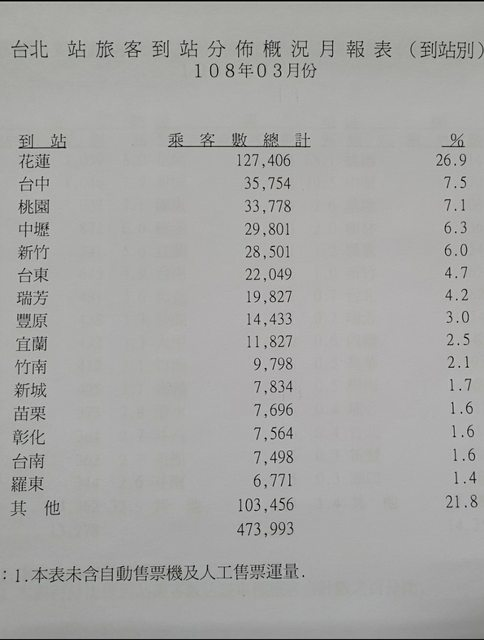
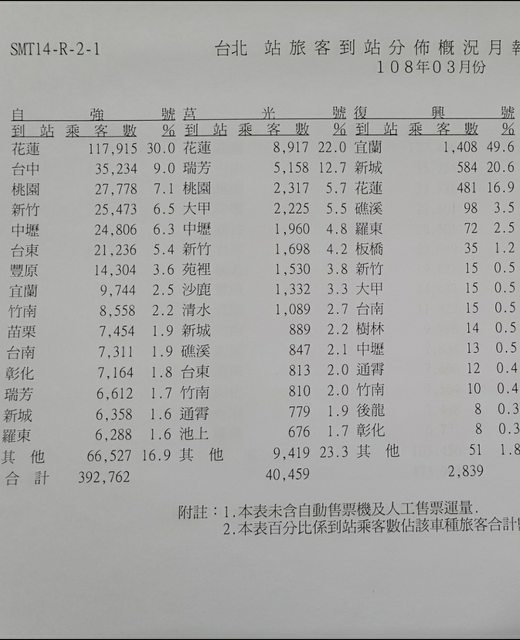

1.台北到板橋



Modela slope:     0.8501352380642233
Modela intercept: 0.17051406144180348
LinearRegression Score:  0.6876885531203173


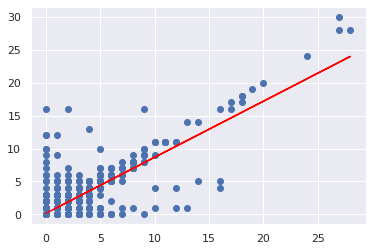

0.8501352380642233
0.17051406144180348
{xtp: 1.13778622298733, ybq: 1.13778622298733}
算出允許誤差
xgboost、lasso比較
[08:09:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7240063978392314


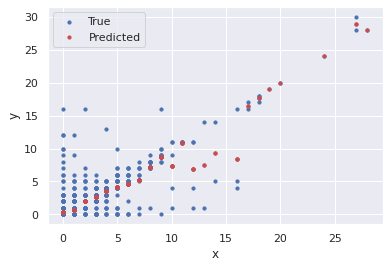

ls Score:  0.6832736144161927


In [70]:
xtp= railtp["delay"].to_numpy()
ybq= railbq["delay"].to_numpy()
xtp= xtp.reshape(-1,1)
modela = LinearRegression(fit_intercept=True)
modela.fit(xtp, ybq)
print("Modela slope:    ", modela.coef_[0])
print("Modela intercept:", modela.intercept_)
print("LinearRegression Score: ",modela.score(xtp,ybq))
predict = modela.predict(xtp)
plt.plot(xtp,predict,c="red")
plt.scatter(xtp,ybq)
plt.show()

k=modela.coef_[0]
l= modela.intercept_
print(k)
print(l)
x,y = symbols('xtp,ybq')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtp,ybq)
predicted1=xgbrModel.predict(xtp)
print("xg Score: ",xgbrModel.score(xtp,ybq))
plt.scatter(xtp, ybq, s=10, label='True')
plt.scatter(xtp, predicted1, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

reg = Lasso(alpha=0.5) # 其中可以調整 alpha 值決定正則化的強度
reg.fit(xtp,ybq)
predicted1=reg.predict(xtp)
print("ls Score: ",reg.score(xtp,ybq))

2.台北到桃園

Modela slope:     0.9081913559809597
Modela intercept: 0.6437163600969014
LinearRegression Score:  0.6522314449600611


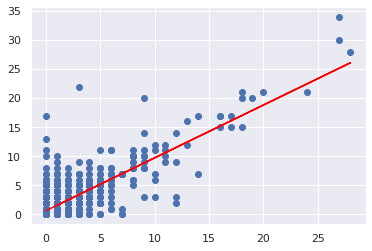

{xtp: 7.01150057246682, yc: 7.01150057246682}
算出允許誤差
xgboost、lasso比較
[08:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6794373091677519


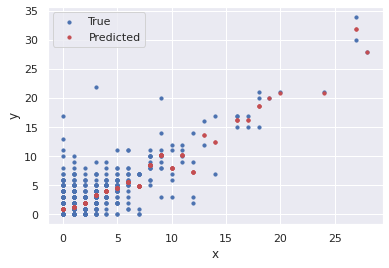

In [71]:
xtp= railtp["delay"].to_numpy()
yc= railc["delay"].to_numpy()
xtp= xtp.reshape(-1,1)
modelaa = LinearRegression(fit_intercept=True)
modelaa.fit(xtp, yc)
print("Modela slope:    ", modelaa.coef_[0])
print("Modela intercept:", modelaa.intercept_)
print("LinearRegression Score: ",modelaa.score(xtp,yc))
predict = modelaa.predict(xtp)
plt.plot(xtp,predict,c="red")
plt.scatter(xtp,yc)
plt.show()
k= modelaa.coef_[0]
l= modelaa.intercept_
x,y = symbols('xtp,yc')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtp,yc)
predicted1=xgbrModel.predict(xtp)
print("xg Score: ",xgbrModel.score(xtp,yc))
plt.scatter(xtp, yc, s=10, label='True')
plt.scatter(xtp, predicted1, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3.台北到中壢

Modela slope:     0.963984882284085
Modela intercept: 1.4299413757314465
LinearRegression Score:  0.6109429592269031


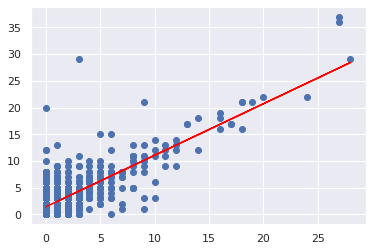

{xtp: 39.7039206427350, yd: 39.7039206427350}
算出允許誤差
xgboost、lasso比較
[08:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6301699010317352


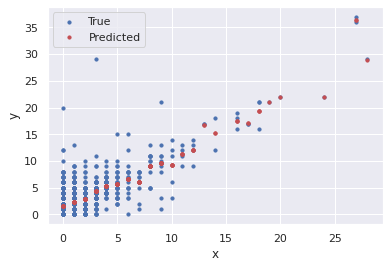

In [72]:
xtp= railtp["delay"].to_numpy()
yd= raild["delay"].to_numpy()
xtp= xtp.reshape(-1,1)
modelad = LinearRegression(fit_intercept=True)
modelad.fit(xtp, yd)
print("Modela slope:    ", modelad.coef_[0])
print("Modela intercept:", modelad.intercept_)
print("LinearRegression Score: ",modelad.score(xtp,yd))
predict = modelad.predict(xtp)
plt.plot(xtp,predict,c="red")
plt.scatter(xtp,yd)
plt.show()
k= modelad.coef_[0]
l= modelad.intercept_
x,y = symbols('xtp,yd')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtp,yd)
predicted1=xgbrModel.predict(xtp)
print("xg Score: ",xgbrModel.score(xtp,yd))
plt.scatter(xtp, yd, s=10, label='True')
plt.scatter(xtp, predicted1, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

4.台北到新竹

Modela slope:     0.732581192836409
Modela intercept: 1.8306970659550217
LinearRegression Score:  0.2977416135940253


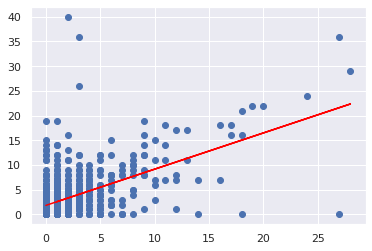

{xtp: 6.84580521980680, ye: 6.84580521980680}
算出允許誤差
xgboost、lasso比較
[08:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.33126767091956


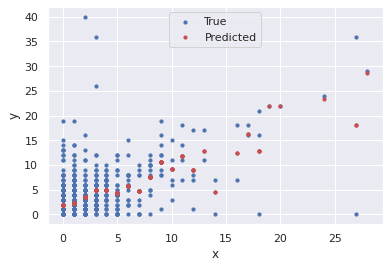

In [73]:
railtp1 = railtp.drop([242398,242553,242709,242871,243024,243176,243328])
xtp= railtp1["delay"].to_numpy()
ye= raile["delay"].to_numpy()
xtp= xtp.reshape(-1,1)
modelae = LinearRegression(fit_intercept=True)
modelae.fit(xtp,ye)
print("Modela slope:    ", modelae.coef_[0])
print("Modela intercept:", modelae.intercept_)
print("LinearRegression Score: ",modelae.score(xtp,ye))
predict = modelae.predict(xtp)
plt.plot(xtp,predict,c="red")
plt.scatter(xtp,ye)
plt.show()
k= modelae.coef_[0]
l= modelae.intercept_
x,y = symbols('xtp,ye')
print(solve([k*x+l-y,x-y],[x,y]))
print("算出允許誤差")
print("xgboost、lasso比較")
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xtp,ye)
predicted1=xgbrModel.predict(xtp)
print("xg Score: ",xgbrModel.score(xtp,ye))
plt.scatter(xtp, ye, s=10, label='True')
plt.scatter(xtp, predicted1, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

5.板橋到桃園

Modelb slope:     0.9110357240489997
Modelb intercept: 0.6642207601577428
LR Score:  0.6897664390665296


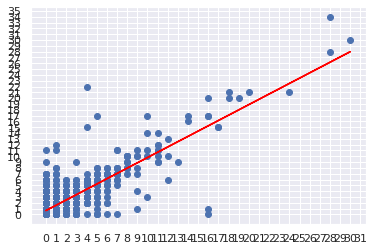

{xbp: 7.46615147549320, yc: 7.46615147549320}
[08:09:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7110360238275466


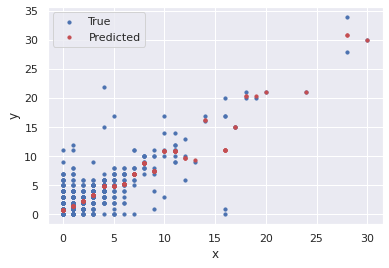

In [74]:

xbq= railbq["delay"].to_numpy()
yc= railc["delay"].to_numpy()
xbq= xbq.reshape(-1,1)
modelb = LinearRegression(fit_intercept=True)
modelb.fit(xbq, yc)
print("Modelb slope:    ", modelb.coef_[0])
print("Modelb intercept:", modelb.intercept_)
print("LR Score: ",modelb.score(xbq,yc))
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = modelb.predict(xbq)
plt.plot(xbq,predict,c="red")
plt.scatter(xbq,yc)
plt.show()
k= modelb.coef_[0]
l= modelb.intercept_
x,y = symbols('xbp,yc')
print(solve([k*x+l-y,x-y],[x,y]))

xgbrModel1=xgb.XGBRegressor()
xgbrModel1.fit(xbq,yc)
predicted3=xgbrModel1.predict(xbq)
print("xg Score: ",xgbrModel1.score(xbq,yc))
plt.scatter(xbq, yc, s=10, label='True')
plt.scatter(xbq, predicted3, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

6.桃園到中壢

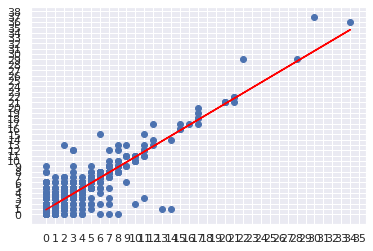

{xc: 99.2530047557226, yd: 99.2530047557226}
LR Score:  0.8167977370924109
[08:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6465463490464936


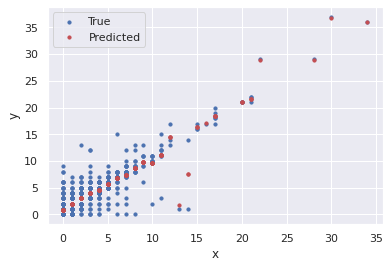

In [75]:

xc= railc["delay"].to_numpy()
yd= raild["delay"].to_numpy()
xc= xc.reshape(-1,1)
modelc = LinearRegression(fit_intercept=True)
modelc.fit(xc, yd)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = modelc.predict(xc)
plt.plot(xc,predict,c="red")
plt.scatter(xc,yd)
plt.show()
k= modelc.coef_[0]
l= modelc.intercept_
x,y = symbols('xc,yd')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",modelc.score(xc,yd))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xc,yd)
predicted2=xgbrModel.predict(xc)
print("xg Score: ",xgbrModel.score(xbq,yc))
plt.scatter(xc, yd, s=10, label='True')
plt.scatter(xc, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

7.中壢到新竹

Modeld slope:     0.7597955245425708
Modeld intercept: 0.7482202492505361


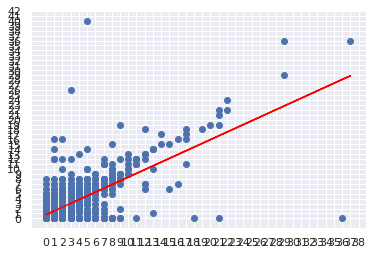

{xd: 3.11493051004015, ye: 3.11493051004015}
LR Score:  0.4899714274039642
[08:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.5688752678692298


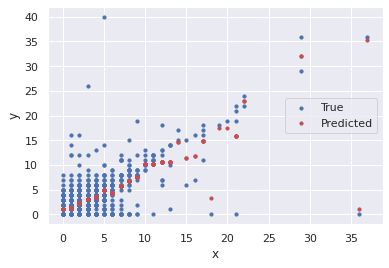

In [76]:

xd= raildd["delay"].to_numpy()
ye= raile["delay"].to_numpy()
xd= xd.reshape(-1,1)
modeld = LinearRegression(fit_intercept=True)
modeld.fit(xd, ye)
print("Modeld slope:    ", modeld.coef_[0])
print("Modeld intercept:", modeld.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = modeld.predict(xd)
plt.plot(xd,predict,c="red")
plt.scatter(xd,ye)
plt.show()
k= modeld.coef_[0]
l= modeld.intercept_
x,y = symbols('xd,ye')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",modeld.score(xd,ye))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xd,ye)
predicted2=xgbrModel.predict(xd)
print("xg Score: ",xgbrModel.score(xd,ye))
plt.scatter(xd, ye, s=10, label='True')
plt.scatter(xd, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

8.新竹到竹南

Modele2 slope:     1.0143519891047017
Modele2 intercept: -0.1541659867948395


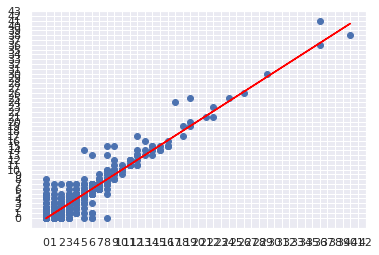

{xe2: 10.7417853839057, ye2: 10.7417853839057}
LR Score:  0.8991806173662428
[08:09:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.9114077963411433


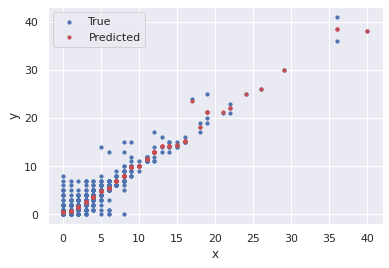

In [77]:

xe2= raile2["delay"].to_numpy()
ye2= railzn2["delay"].to_numpy()
xe2= xe2.reshape(-1,1)
modele2 = LinearRegression(fit_intercept=True)
modele2.fit(xe2, ye2)
print("Modele2 slope:    ", modele2.coef_[0])
print("Modele2 intercept:", modele2.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = modele2.predict(xe2)
plt.plot(xe2,predict,c="red")
plt.scatter(xe2,ye2)
plt.show()
k= modele2.coef_[0]
l= modele2.intercept_
x,y = symbols('xe2,ye2')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",modele2.score(xe2,ye2))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xe2,ye2)
predicted2=xgbrModel.predict(xe2)
print("xg Score: ",xgbrModel.score(xe2,ye2))
plt.scatter(xe2, ye2, s=10, label='True')
plt.scatter(xe2, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

9.新竹到豐原

Modele1 slope:     0.8685099443777887
Modele1 intercept: 0.10201343096686566


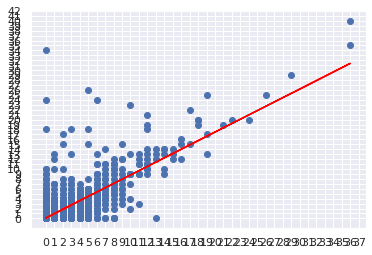

{xe1: 0.775826205899286, ye1: 0.775826205899286}
LR Score:  0.5362305105440841
[08:09:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.5830435868851223


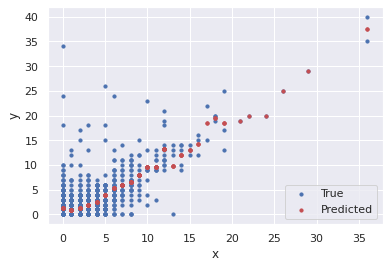

In [78]:

xe1= raile1["delay"].to_numpy()
ye1= rail1e["delay"].to_numpy()
xe1= xe1.reshape(-1,1)
modele1 = LinearRegression(fit_intercept=True)
modele1.fit(xe1, ye1)
print("Modele1 slope:    ", modele1.coef_[0])
print("Modele1 intercept:", modele1.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = modele1.predict(xe1)
plt.plot(xe1,predict,c="red")
plt.scatter(xe1,ye1)
plt.show()
k= modele1.coef_[0]
l= modele1.intercept_
x,y = symbols('xe1,ye1')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",modele1.score(xe1,ye1))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xe1,ye1)
predicted2=xgbrModel.predict(xe1)
print("xg Score: ",xgbrModel.score(xe1,ye1))
plt.scatter(xe1, ye1, s=10, label='True')
plt.scatter(xe1, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

10.竹南到苗栗

Model0z slope:     0.9603638699538631
Model0z intercept: -0.28332324251365293


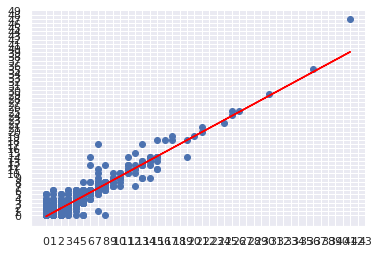

{x0z: -7.14810558406840, y0z: -7.14810558406840}
LR Score:  0.8951551662075294
[08:09:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.9116962504019358


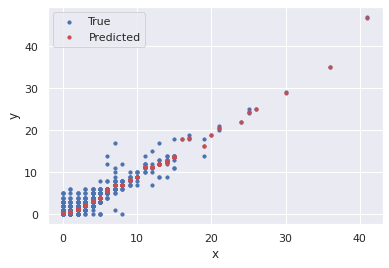

In [79]:


y0z= rail00["delay"].to_numpy()
x0z= railzn["delay"].to_numpy()
x0z= x0z.reshape(-1,1)
model0z = LinearRegression(fit_intercept=True)
model0z.fit(x0z, y0z)
print("Model0z slope:    ", model0z.coef_[0])
print("Model0z intercept:", model0z.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model0z.predict(x0z)
plt.plot(x0z,predict,c="red")
plt.scatter(x0z,y0z)
plt.show()
k= model0z.coef_[0]
l= model0z.intercept_
x,y = symbols('x0z,y0z')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model0z.score(x0z,y0z))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x0z,y0z)
predicted2=xgbrModel.predict(x0z)
print("xg Score: ",xgbrModel.score(x0z,y0z))
plt.scatter(x0z, y0z, s=10, label='True')
plt.scatter(x0z, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

11.苗栗到豐原

Model0 slope:     0.9107309943322105
Model0 intercept: 0.11953924746941658


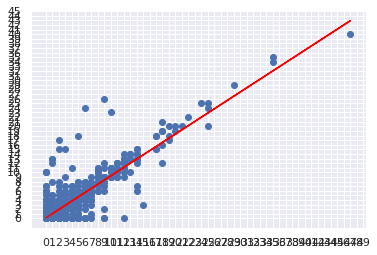

{x0: 1.33909016433180, y0: 1.33909016433180}
LR Score:  0.7721591548653711
[08:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7875258642184916


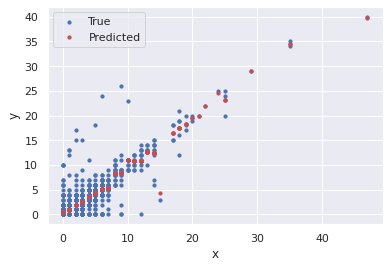

In [80]:
x0= rail0["delay"].to_numpy()
y0= rail1["delay"].to_numpy()
x0= x0.reshape(-1,1)
model0 = LinearRegression(fit_intercept=True)
model0.fit(x0, y0)
print("Model0 slope:    ", model0.coef_[0])
print("Model0 intercept:", model0.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model0.predict(x0)
plt.plot(x0,predict,c="red")
plt.scatter(x0,y0)
plt.show()
k= model0.coef_[0]
l= model0.intercept_
x,y = symbols('x0,y0')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model0.score(x0,y0))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x0,y0)
predicted2=xgbrModel.predict(x0)
print("xg Score: ",xgbrModel.score(x0,y0))
plt.scatter(x0, y0, s=10, label='True')
plt.scatter(x0, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

12.豐原到台中

Model1 slope:     0.9516999399343958
Model1 intercept: 0.15206025161998005


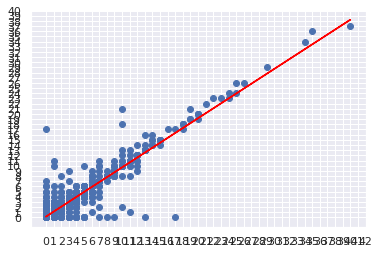

{x1: 3.14824146001978, y1: 3.14824146001978}
LR Score:  0.8764759671544524
[08:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8874194174258049


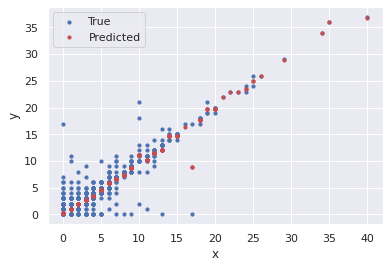

In [81]:

x1= rail1["delay"].to_numpy()
y1= rail2["delay"].to_numpy()
x1= x1.reshape(-1,1)
model1 = LinearRegression(fit_intercept=True)
model1.fit(x1, y1)
print("Model1 slope:    ", model1.coef_[0])
print("Model1 intercept:", model1.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model1.predict(x1)
plt.plot(x1,predict,c="red")
plt.scatter(x1,y1)
plt.show()
k= model1.coef_[0]
l= model1.intercept_
x,y = symbols('x1,y1')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model1.score(x1,y1))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x1,y1)
predicted2=xgbrModel.predict(x1)
print("xg Score: ",xgbrModel.score(x1,y1))
plt.scatter(x1, y1, s=10, label='True')
plt.scatter(x1, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [82]:
rail2 = rail[rail["Station"]=='Taichung']
rail3 = rail[rail["Station"]=='Changhua']
rail33 = rails[rails["Station"]=='Changhua']
rail4 = rails[rails["Station"]=='Yuanlin']
rail5 = rails[rails["Station"]=='Douliu']
rail6 = rails[rails["Station"]=='Chiayi']
rail7 = rails[rails["Station"]=='Tainan']
rail78 = rail7.drop([266464])
rail8 = rails[rails["Station"]=='Xinzuoying']
rail9 = rails[rails["Station"]=='Kaohsiung']

13.台中到彰化

Model2 slope:     0.8514680523538116
Model2 intercept: 0.5027848439202076


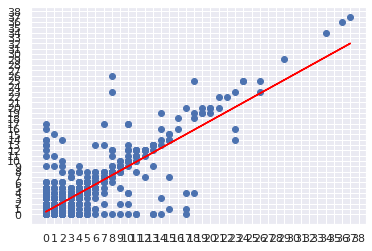

{x2: 3.38502828440567, y2: 3.38502828440567}
LR Score:  0.691340377020732
[08:09:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7247253035732908


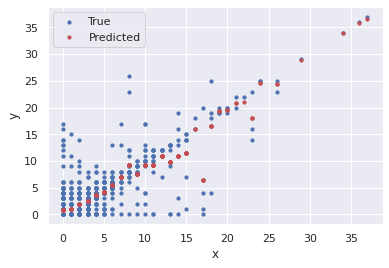

In [83]:

x2= rail2["delay"].to_numpy()
y2= rail3["delay"].to_numpy()
x2= x2.reshape(-1,1)
model2 = LinearRegression(fit_intercept=True)
model2.fit(x2, y2)
print("Model2 slope:    ", model2.coef_[0])
print("Model2 intercept:", model2.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model2.predict(x2)
plt.plot(x2,predict,c="red")
plt.scatter(x2,y2)
plt.show()
k= model2.coef_[0]
l= model2.intercept_
x,y = symbols('x2,y2')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model2.score(x2,y2))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x2,y2)
predicted2=xgbrModel.predict(x2)
print("xg Score: ",xgbrModel.score(x2,y2))
plt.scatter(x2, y2, s=10, label='True')
plt.scatter(x2, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

14.台中到台南

Model27 slope:     0.8401583367445762
Model27 intercept: 1.9067624016883604


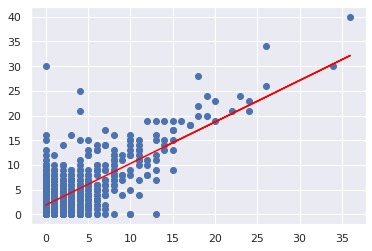

{x27: 11.9290700738104, y27: 11.9290700738104}
LR Score:  0.515764412187087
[08:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.5563534015994114


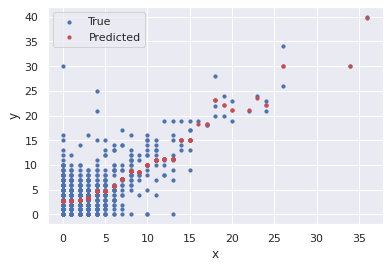

In [84]:
x27 = rail27[rail27["Station"]=="Taichung"]
x27= x27["delay"].to_numpy()
y27 = rail27[rail27["Station"]=="Tainan"]
y27= y27["delay"].to_numpy()
x27= x27.reshape(-1,1)
model27 = LinearRegression(fit_intercept=True)
model27.fit(x27, y27)
print("Model27 slope:    ", model27.coef_[0])
print("Model27 intercept:", model27.intercept_)
predict = model27.predict(x27)
plt.plot(x27,predict,c="red")
plt.scatter(x27,y27)
plt.show()
k= model27.coef_[0]
l= model27.intercept_
x,y = symbols('x27,y27')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model27.score(x27,y27))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x27,y27)
predicted27=xgbrModel.predict(x27)
print("xg Score: ",xgbrModel.score(x27,y27))
plt.scatter(x27, y27, s=10, label='True')
plt.scatter(x27, predicted27, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

15.彰化到員林

Model3 slope:     0.8507523243460318
Model3 intercept: 0.7472311437518653


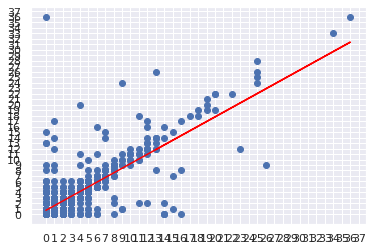

{x3: 5.00665179861378, y3: 5.00665179861378}
LR Score:  0.6476118953770396
[08:09:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7053891196406152


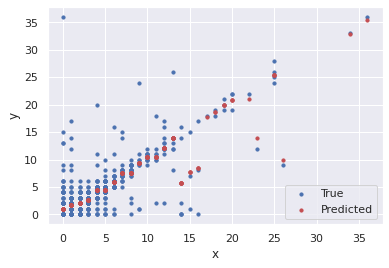

In [85]:

x3= rail33["delay"].to_numpy()
y3= rail4["delay"].to_numpy()
x3= x3.reshape(-1,1)
model3 = LinearRegression(fit_intercept=True)
model3.fit(x3, y3)
print("Model3 slope:    ", model3.coef_[0])
print("Model3 intercept:", model3.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model3.predict(x3)
plt.plot(x3,predict,c="red")
plt.scatter(x3,y3)
plt.show()
k= model3.coef_[0]
l= model3.intercept_
x,y = symbols('x3,y3')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model3.score(x3,y3))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x3,y3)
predicted2=xgbrModel.predict(x3)
print("xg Score: ",xgbrModel.score(x3,y3))
plt.scatter(x3, y3, s=10, label='True')
plt.scatter(x3, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

16.員林到斗六

Model4 slope:     0.8065429317736484
Model4 intercept: 0.7258171934485413


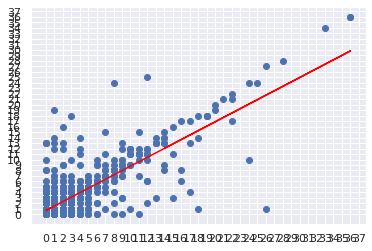

{x4: 3.75182566397268, y4: 3.75182566397268}
LR Score:  0.6495835033110937
[08:09:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.6775454225698472


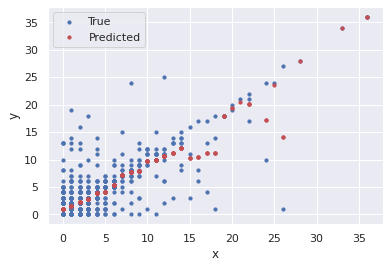

In [86]:
x4= rail4["delay"].to_numpy()
y4= rail5["delay"].to_numpy()
x4= x4.reshape(-1,1)
model4 = LinearRegression(fit_intercept=True)
model4.fit(x4, y4)
print("Model4 slope:    ", model4.coef_[0])
print("Model4 intercept:", model4.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model4.predict(x4)
plt.plot(x4,predict,c="red")
plt.scatter(x4,y4)
plt.show()
k= model4.coef_[0]
l= model4.intercept_
x,y = symbols('x4,y4')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model4.score(x4,y4))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x4,y4)
predicted2=xgbrModel.predict(x4)
print("xg Score: ",xgbrModel.score(x4,y4))
plt.scatter(x4, y4, s=10, label='True')
plt.scatter(x4, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

17.斗六到嘉義

Model5 slope:     0.9710604174228421
Model5 intercept: 1.250359217700685


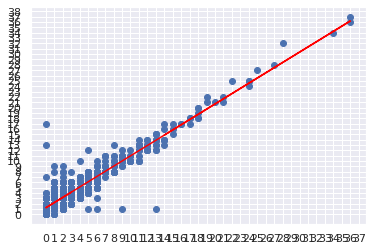

{x5: 43.2058484038950, y5: 43.2058484038950}
LR Score:  0.8975928413085742
[08:09:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.901678212020816


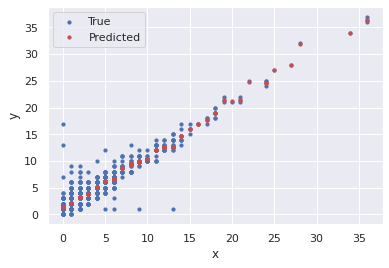

In [87]:

x5= rail5["delay"].to_numpy()
y5= rail6["delay"].to_numpy()
x5= x5.reshape(-1,1)
model5 = LinearRegression(fit_intercept=True)
model5.fit(x5, y5)
print("Model5 slope:    ", model5.coef_[0])
print("Model5 intercept:", model5.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model5.predict(x5)
plt.plot(x5,predict,c="red")
plt.scatter(x5,y5)
plt.show()
k= model5.coef_[0]
l= model5.intercept_
x,y = symbols('x5,y5')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model5.score(x5,y5))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x5,y5)
predicted2=xgbrModel.predict(x5)
print("xg Score: ",xgbrModel.score(x5,y5))
plt.scatter(x5, y5, s=10, label='True')
plt.scatter(x5, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

18.嘉義到台南

Model6 slope:     0.9615290861183085
Model6 intercept: -0.10465636438732684


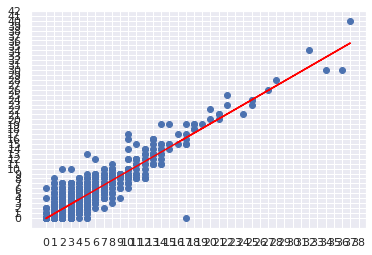

{x6: -2.72040234628094, y6: -2.72040234628094}
LR Score:  0.8408631032789913
[08:09:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.8508100494474307


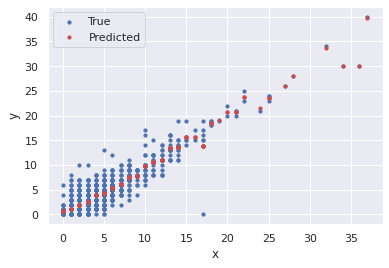

In [88]:
x6= rail6["delay"].to_numpy()
y6= rail7["delay"].to_numpy()
x6= x6.reshape(-1,1)
model6 = LinearRegression(fit_intercept=True)
model6.fit(x6, y6)
print("Model6 slope:    ", model6.coef_[0])
print("Model6 intercept:", model6.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model6.predict(x6)
plt.plot(x6,predict,c="red")
plt.scatter(x6,y6)
plt.show()
k= model6.coef_[0]
l= model6.intercept_
x,y = symbols('x6,y6')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model6.score(x6,y6))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x6,y6)
predicted2=xgbrModel.predict(x6)
print("xg Score: ",xgbrModel.score(x6,y6))
plt.scatter(x6, y6, s=10, label='True')
plt.scatter(x6, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

19.台南到新左營

Model7 slope:     0.13382282667446582
Model7 intercept: 3.3205319984538804


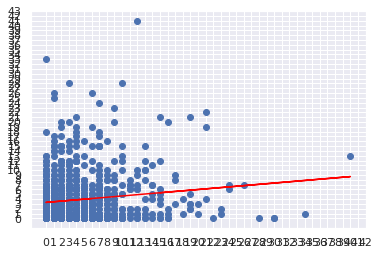

{x7: 3.83354826323266, y7: 3.83354826323266}
LR Score:  0.016927547737145998
[08:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.057810969735960234


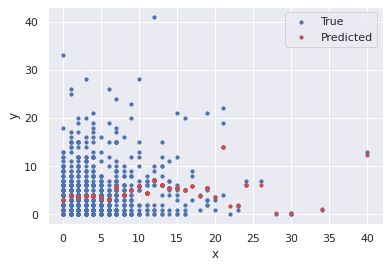

In [89]:
x7= rail78["delay"].to_numpy()
y7= rail8["delay"].to_numpy()
x7= x7.reshape(-1,1)
model7 = LinearRegression(fit_intercept=True)
model7.fit(x7, y7)
print("Model7 slope:    ", model7.coef_[0])
print("Model7 intercept:", model7.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model7.predict(x7)
plt.plot(x7,predict,c="red")
plt.scatter(x7,y7)
plt.show()
k= model7.coef_[0]
l= model7.intercept_
x,y = symbols('x7,y7')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model7.score(x7,y7))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x7,y7)
predicted2=xgbrModel.predict(x7)
print("xg Score: ",xgbrModel.score(x7,y7))
plt.scatter(x7, y7, s=10, label='True')
plt.scatter(x7, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

20.台南到高雄

Model79 slope:     0.14366399034387464
Model79 intercept: 2.159631035771323


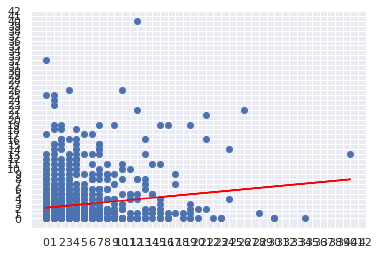

{x79: 2.52194350280628, y79: 2.52194350280628}
LR Score:  0.02121718315519039
[08:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.07943007362375476


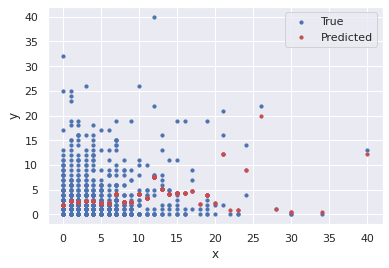

In [90]:
x79= rail78["delay"].to_numpy()
y79= rail9["delay"].to_numpy()
x79= x7.reshape(-1,1)
model79 = LinearRegression(fit_intercept=True)
model79.fit(x79, y79)
print("Model79 slope:    ", model79.coef_[0])
print("Model79 intercept:", model79.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model79.predict(x79)
plt.plot(x79,predict,c="red")
plt.scatter(x79,y79)
plt.show()
k= model79.coef_[0]
l= model79.intercept_
x,y = symbols('x79,y79')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model79.score(x79,y79))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x79,y79)
predicted2=xgbrModel.predict(x79)
print("xg Score: ",xgbrModel.score(x79,y79))
plt.scatter(x79, y79, s=10, label='True')
plt.scatter(x79, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

21.新左營到高雄

Model89 slope:     0.8109069551572793
Model89 intercept: -0.3921171296859609


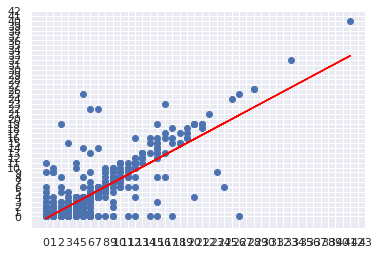

{x89: -2.07367293710938, y89: -2.07367293710938}
LR Score:  0.7151551607294626
[08:09:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7554778080278065


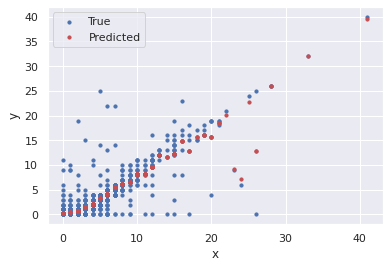

In [91]:
x89= rail8["delay"].to_numpy()
y89= rail9["delay"].to_numpy()
x89= x89.reshape(-1,1)
model89 = LinearRegression(fit_intercept=True)
model89.fit(x89, y89)
print("Model89 slope:    ", model89.coef_[0])
print("Model89 intercept:", model89.intercept_)
plt.xticks(new_ticks)
plt.yticks(new_ticks)
predict = model89.predict(x89)
plt.plot(x89,predict,c="red")
plt.scatter(x89,y89)
plt.show()
k= model89.coef_[0]
l= model89.intercept_
x,y = symbols('x89,y89')
print(solve([k*x+l-y,x-y],[x,y]))
print("LR Score: ",model89.score(x89,y89))
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x89,y89)
predicted2=xgbrModel.predict(x89)
print("xg Score: ",xgbrModel.score(x89,y89))
plt.scatter(x89, y89, s=10, label='True')
plt.scatter(x89, predicted2, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()